MODEL TRAINING

In [2]:
pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/9.3 MB 7.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 11.6 MB/s eta 0:00:01
   -------- ------------------------------- 1.9/9.3 MB 11.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/9.3 MB 12.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.3 MB 13.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/9.3 MB 12.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.3 MB 14.0 MB/s eta 0:00:01
   ---------------------------- ----------- 6.5/9.3 MB 14.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.4/9.3 MB 14.4 MB/s eta 0:00:01
   ------------------------------------ --- 8.4/9.3 MB 14.9 MB/s eta 0:00:01
   -------------------------------------- - 8.9/9.3 MB 14.6 MB/s eta 0:00:01
   ------

In [3]:
pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 640.0 kB/s eta 0:02:38
   ---------------------------------------- 0.2/101.1 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 1.0/101.1 MB 7.9 MB/s eta 0:00:13
    --------------------------------------- 1.3/101.1 MB 7.5 MB/s eta 0:00:14
    --------------------------------------- 1.9/101.1 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 2.6/101.1 MB 9.2 MB/s eta 0:00:11
   - -------------------------------------- 3.5/101.1 MB 10.6 MB/s eta 0:00:10
   - -------------------------------------- 3.9/101.1 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 3.9/101.1 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 3.9/101.1 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 4.6/101.1 MB 8.3 MB/s eta 0:00:12
   -- ------------------------------------- 5.2/101.1 MB 9.0 MB/s

In [2]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.6/99.8 MB 2.5 MB/s eta 0:00:41
    --------------------------------------- 1.5/99.8 MB 4.9 MB/s eta 0:00:21
    --------------------------------------- 2.4/99.8 MB 6.9 MB/s eta 0:00:15
   - -------------------------------------- 3.3/99.8 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 4.3/99.8 MB 9.8 MB/s eta 0:00:10
   - -------------------------------------- 4.9/99.8 MB 10.1 MB/s eta 0:00:10
   -- --------------

In [3]:
# Import data and required packages
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
#Import the CSV data as pandas data frames
StudentPerformance = pd.read_csv('data/StudentsPerformance.csv')
StudentPerformance.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Preparing X and Y variable
X = StudentPerformance.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable: ",end=" ")
print(StudentPerformance['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(StudentPerformance['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(StudentPerformance['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(StudentPerformance['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(StudentPerformance['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [8]:
Y = StudentPerformance['math_score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
#Create column transformer with 3 types of transformers
number_features = X.select_dtypes(exclude="object").columns #select all numerical features
categorical_features = X.select_dtypes(include="object").columns 

#Transforming columns or data points
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer #This will combine the one hot encoder and Standard Scaler

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,number_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [13]:
#Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [14]:
#Create an evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train) #Train Model

    #Model predictions 
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train,Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance training set')
    print("- Root Meed Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------------')

    print('Model performance test set')
    print("- Root Meed Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance training set
- Root Meed Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
---------------------------------------------
Model performance test set
- Root Meed Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance training set
- Root Meed Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------------------------
Model performance test set
- Root Meed Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance training set
- Root Meed Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------------
Model performance test set
- Root Meed Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance training set
- Root Meed Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
------------------

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score


In [23]:
#Linear Regression
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,Y_train)
Y_pred = linear_model.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


Text(0, 0.5, 'Pedicted')

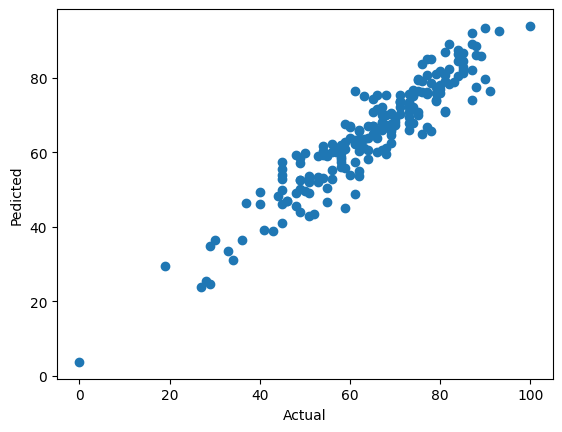

In [24]:
#Plot pred and Y_test
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Pedicted")

<Axes: xlabel='math_score'>

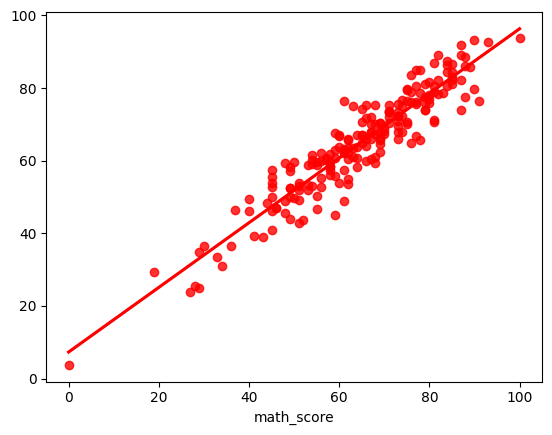

In [25]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red')

In [26]:
#Differece between actual and predicted values
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
